## 1. Import necessary libraries

In [1]:
# Import the required libraries for data manipulation, visualization, and modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import pickle

# Ignore warnings
warnings.filterwarnings("ignore")

## 2. Loading the dataset

In [2]:
# Load the diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")

## 3. Inspecting the dataset

In [3]:
# Display the first 5 rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Get information about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Describing the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Data preprocessing

#### 4.1. Detect duplicates

In [6]:
# Count the number of duplicate rows
duplicate_rows_count = diabetes_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


#### 4.2. Detect outliers

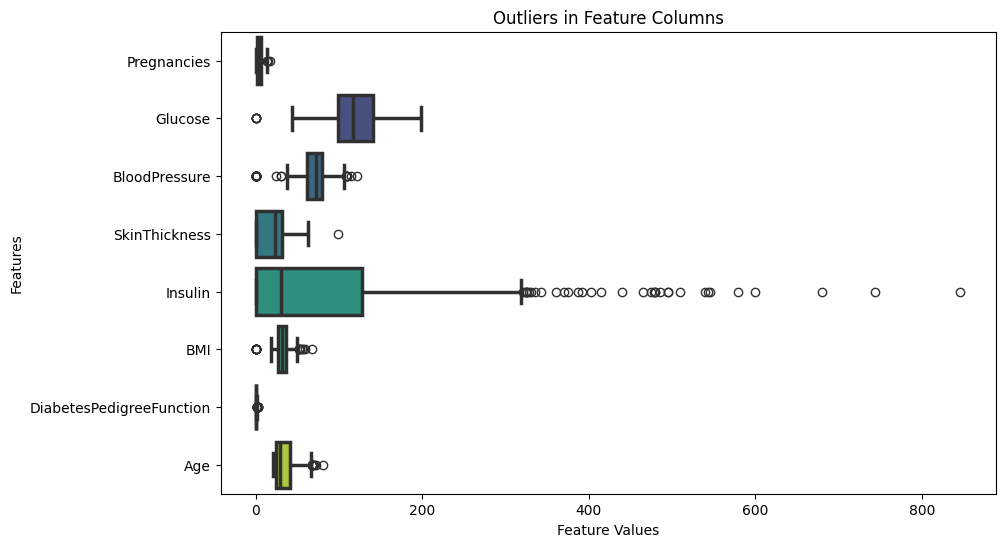

In [7]:
# Plot a boxplot to identify the outliers in the features
feature_cols = [col for col in diabetes_data.columns if col != "Outcome"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data[feature_cols], orient='h', palette='viridis', linewidth=2.5)
plt.title("Outliers in Feature Columns")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.show()

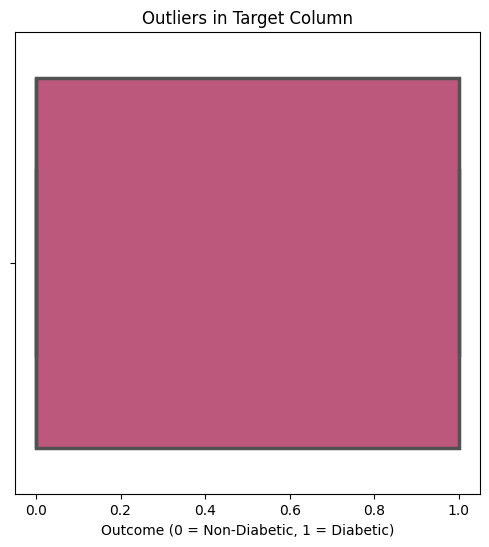

In [8]:
# Plot a boxplot to identify the outliers in the target column
plt.figure(figsize=(6, 6))
sns.boxplot(x=diabetes_data["Outcome"], orient='h', linewidth=2.5, palette='plasma')
plt.title("Outliers in Target Column")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.show()

#### 4.3. Remove outliers

In [9]:
# Function to remove outliers from specified columns in a DataFrame
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        floor, ceil = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[column] = df[column].clip(floor, ceil)
        print(f"The column: {column}, has been treated for outliers.")
    return df

diabetes_data = remove_outliers(diabetes_data, feature_cols)

The column: Pregnancies, has been treated for outliers.
The column: Glucose, has been treated for outliers.
The column: BloodPressure, has been treated for outliers.
The column: SkinThickness, has been treated for outliers.
The column: Insulin, has been treated for outliers.
The column: BMI, has been treated for outliers.
The column: DiabetesPedigreeFunction, has been treated for outliers.
The column: Age, has been treated for outliers.


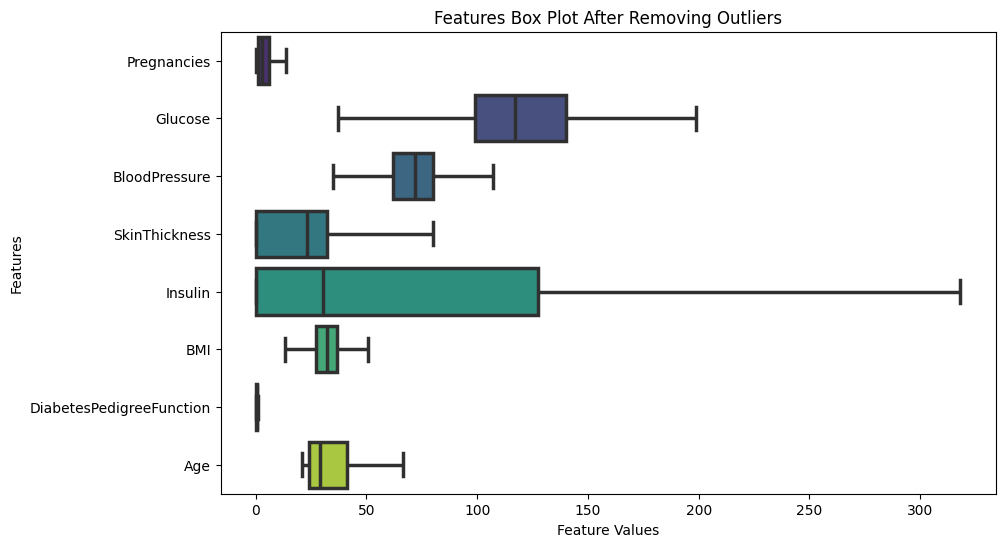

In [10]:
# Display the boxplot again to show that the outliers have been removed
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data[feature_cols], orient='h', palette='viridis', linewidth=2.5)
plt.title("Features Box Plot After Removing Outliers")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.show()

## 5. Explore the data

#### 5.1. Visualize the distribution of the dataset columns

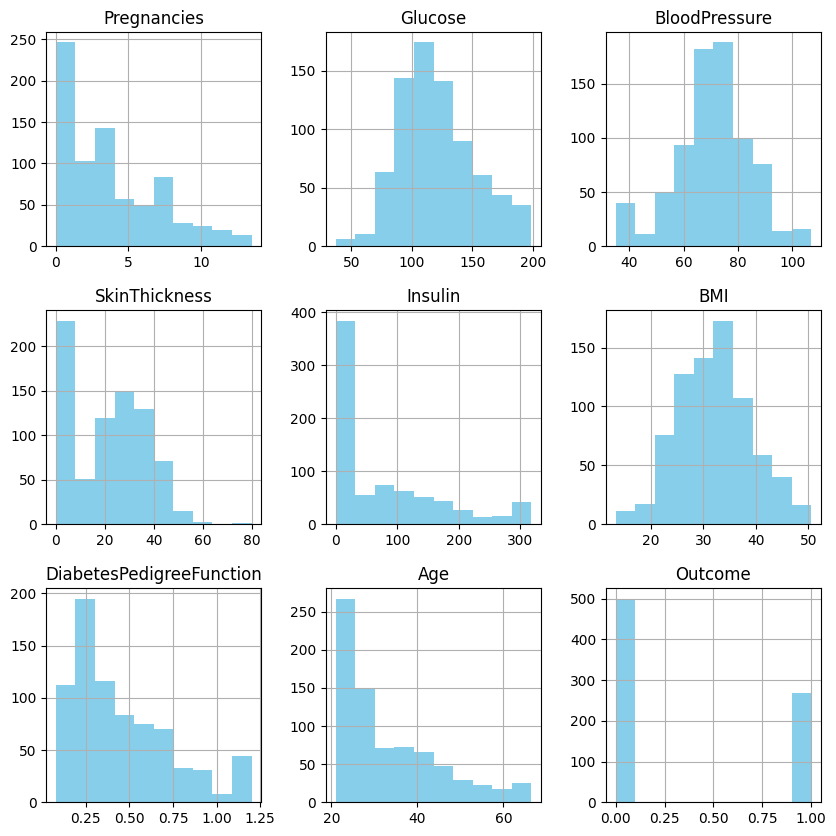

In [11]:
diabetes_data.hist(bins=10, figsize=(10, 10),color='#87CEEB')
plt.show()

#### 5.2. Check the class imbalance

Outcome Class Ratio: 0.6510416666666666


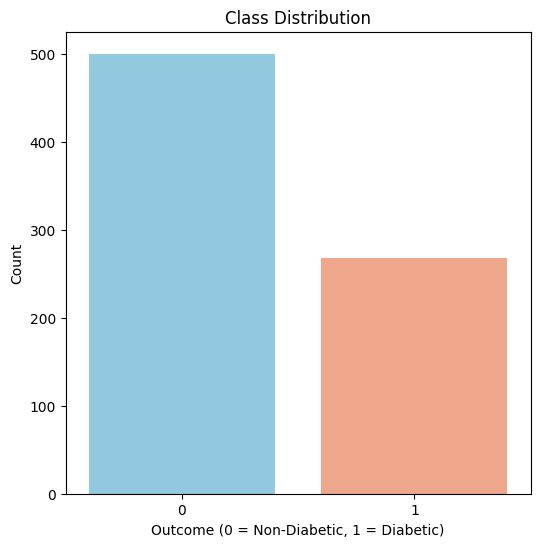

In [12]:
outcome_counts = diabetes_data['Outcome'].value_counts()
print("Outcome Class Ratio:", outcome_counts[0] / outcome_counts.sum())
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=diabetes_data, palette=['#87CEEB','#FFA07A'])
plt.title("Class Distribution")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.show()

#### 5.3. Analyze the correlation between features

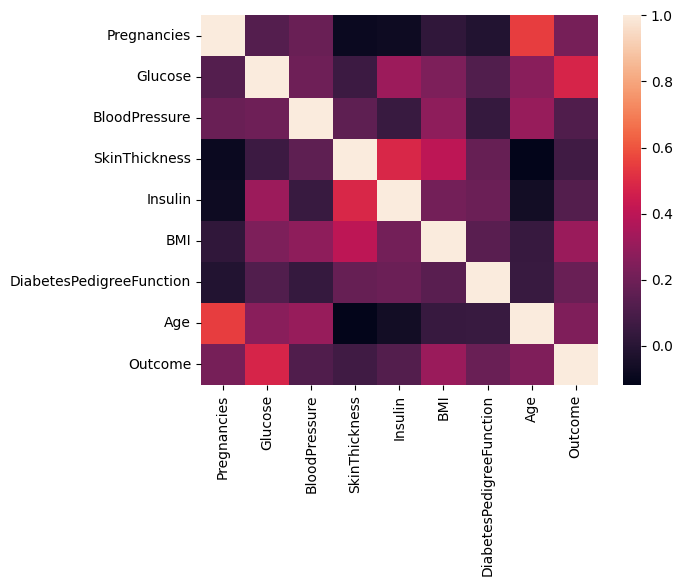

In [13]:
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix)
plt.show()

## 6. Prepare the data for model building

In [14]:
X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

## 7. Build the classification model

In [15]:
svc = SVC()

## 8. Hyperparameter tuning

In [16]:
# Define the grid of hyperparameters for Randomized Search
param_dist = {
    'kernel': ['poly', 'linear', 'rbf'],
    'degree': [2, 3, 4],
    'C': [10, 100]
}

# Define the scoring function using accuracy score
scoring = make_scorer(accuracy_score)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=10, cv=5, scoring=scoring)

# Perform the randomized search
random_search.fit(X, y)

# Display best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'kernel': 'linear', 'degree': 2, 'C': 100}
Best Score: 0.7670146846617435


## 9. Save the model

In [19]:
# Refit the model with the best parameters
best_svc = random_search.best_estimator_

# Saving the model using Pickle
pickle.dump(best_svc, open('diabetes_model.pkl', 'wb'))

## 10. Build a flask web app

#### Please refer to the flask_app.py file for the implementation of the Flask web application.